# 1. Title, Name and References

#### Title

#### Introduction

#### Team member
1. Ngoc Chau Tran - 300307368
2. Leozítor Floro de Souza - 300334919
3. Carolina Henrique de Melo Louback - 300306289

#### References

# 2. Library import and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from numpy import mean
from sklearn import metrics
from datetime import datetime as dt
from xgboost import XGBClassifier
from sklearn import datasets, linear_model
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

%matplotlib inline

# 3. Data Analysis, Preparation and Wrangling

In [2]:
df2 = pd.read_csv('bank-sampled.csv') # full dataset
df = pd.read_csv('bank-sampled-9K.csv') # 20% dataset

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,blue-collar,married,secondary,no,580,yes,no,unknown,16,may,192,1,-1,0,unknown,no
1,47,services,single,secondary,no,3644,no,no,unknown,9,jun,83,2,-1,0,unknown,no
2,25,student,single,tertiary,no,538,yes,no,cellular,20,apr,226,1,-1,0,unknown,no
3,42,management,married,tertiary,no,1773,no,no,cellular,9,apr,311,1,336,1,failure,no
4,56,management,married,tertiary,no,217,no,yes,cellular,21,jul,121,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,26,admin.,single,tertiary,no,689,no,no,cellular,25,mar,78,1,-1,0,unknown,no
9038,47,management,married,tertiary,no,1890,no,no,cellular,8,jul,161,1,-1,0,unknown,no
9039,32,blue-collar,single,secondary,no,217,yes,no,cellular,15,may,692,3,-1,0,unknown,yes
9040,52,admin.,divorced,secondary,no,0,yes,no,unknown,26,may,206,1,-1,0,unknown,no


In [5]:
# dropping duration as suggested by the documentation
df.drop('duration', axis=1, inplace=True)

#Convert the two-column time to a column containing the number of days till the last day of campaing
last_date = "18 Nov, 2010" # assume the analysis date was nov 18th 2010.
dt_1 = dt.strptime(last_date, "%d %b, %Y") #change it to datetime

#Convert month first letter to upper case
df['month'] = df['month'].apply(lambda x: x.capitalize())
df['date'] = df['day'].astype(str) + " " + df['month'] + ", 2010"

#Calculate duration between two dates
df['last_contact'] = df['date'].apply(lambda x: (dt_1 - dt.strptime(x, "%d %b, %Y")).days)

#drop unacessary columns
df.drop(columns={'day', 'date', 'month'}, axis=1, inplace=True)

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,last_contact
0,40,blue-collar,married,secondary,no,580,yes,no,unknown,1,-1,0,unknown,no,186
1,47,services,single,secondary,no,3644,no,no,unknown,2,-1,0,unknown,no,162
2,25,student,single,tertiary,no,538,yes,no,cellular,1,-1,0,unknown,no,212
3,42,management,married,tertiary,no,1773,no,no,cellular,1,336,1,failure,no,223
4,56,management,married,tertiary,no,217,no,yes,cellular,2,-1,0,unknown,no,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,26,admin.,single,tertiary,no,689,no,no,cellular,1,-1,0,unknown,no,238
9038,47,management,married,tertiary,no,1890,no,no,cellular,1,-1,0,unknown,no,133
9039,32,blue-collar,single,secondary,no,217,yes,no,cellular,3,-1,0,unknown,yes,187
9040,52,admin.,divorced,secondary,no,0,yes,no,unknown,1,-1,0,unknown,no,176


In [7]:
df.shape

(9042, 15)

In [8]:
# Display the summary statistics of the data
df.describe()

,age,balance,campaign,pdays,previous,last_contact
count,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000
mean,40.958195,1367.082061,2.756691,40.273391,0.580624,151.159699
std,10.621398,3130.311959,3.008022,100.223320,2.012452,74.298372
min,18.000000,-2712.000000,1.000000,-1.000000,0.000000,-43.000000
25%,33.000000,79.000000,1.000000,-1.000000,0.000000,105.000000
50%,39.000000,453.500000,2.000000,-1.000000,0.000000,167.000000
75%,48.000000,1414.750000,3.000000,-1.000000,0.000000,193.000000
max,93.000000,98417.000000,55.000000,842.000000,58.000000,315.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           9042 non-null   int64 
 1   job           9042 non-null   object
 2   marital       9042 non-null   object
 3   education     9042 non-null   object
 4   default       9042 non-null   object
 5   balance       9042 non-null   int64 
 6   housing       9042 non-null   object
 7   loan          9042 non-null   object
 8   contact       9042 non-null   object
 9   campaign      9042 non-null   int64 
 10  pdays         9042 non-null   int64 
 11  previous      9042 non-null   int64 
 12  poutcome      9042 non-null   object
 13  y             9042 non-null   object
 14  last_contact  9042 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 1.0+ MB


In [10]:
df[['job', 'marital', 'education', 'contact', 'poutcome']]

,job,marital,education,contact,poutcome
0,blue-collar,married,secondary,unknown,unknown
1,services,single,secondary,unknown,unknown
2,student,single,tertiary,cellular,unknown
3,management,married,tertiary,cellular,failure
4,management,married,tertiary,cellular,unknown
...,...,...,...,...,...
9037,admin.,single,tertiary,cellular,unknown
9038,management,married,tertiary,cellular,unknown
9039,blue-collar,single,secondary,cellular,unknown
9040,admin.,divorced,secondary,unknown,unknown


In [11]:
# Number of unique values in each column
df.nunique()

age               71
job               12
marital            3
education          4
default            2
balance         3474
housing            2
loan               2
contact            3
campaign          36
pdays            373
previous          32
poutcome           4
y                  2
last_contact     284
dtype: int64

In [12]:
# Verifying if Null values exist
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
last_contact    0
dtype: int64

<AxesSubplot:title={'center':'JOB'}>

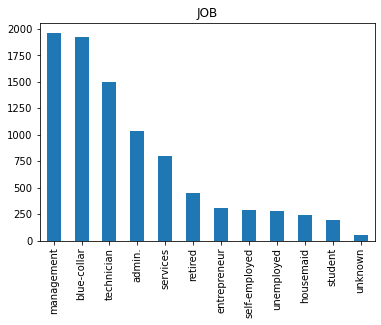

In [13]:
#Job
df['job'].value_counts().plot(kind='bar', title='JOB')

<AxesSubplot:title={'center':'Marital'}>

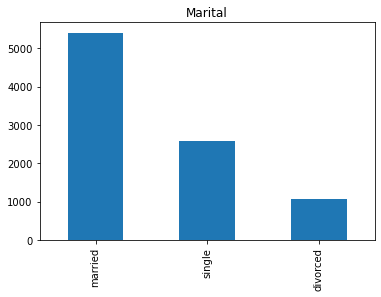

In [14]:
#Marital
df['marital'].value_counts().plot(kind='bar', title='Marital')

<AxesSubplot:title={'center':'Education'}>

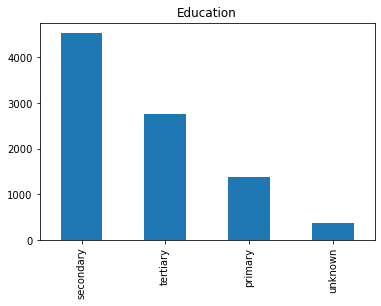

In [15]:
#education
df['education'].value_counts().plot(kind='bar', title='Education')

<AxesSubplot:title={'center':'Contact'}>

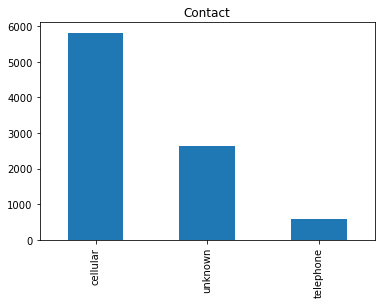

In [16]:
#contact
df['contact'].value_counts().plot(kind='bar', title='Contact')

<AxesSubplot:title={'center':'pOutcome'}>

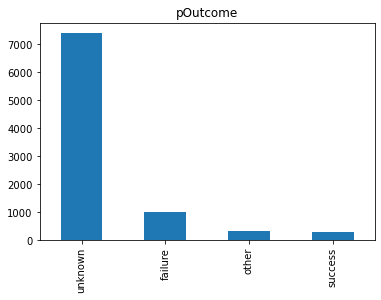

In [17]:
#poutcome
df['poutcome'].value_counts().plot(kind='bar', title='pOutcome')

In [18]:
#Get dummy variables from catgeorical variables
job = pd.get_dummies(df['job'],prefix='job',drop_first=True)
marital = pd.get_dummies(df['marital'],prefix='marital',drop_first=True)
education = pd.get_dummies(df['education'],prefix='education',drop_first=True)
default = pd.get_dummies(df['default'],prefix='default',drop_first=True)
housing = pd.get_dummies(df['housing'],prefix='housing',drop_first=True)
loan = pd.get_dummies(df['loan'],prefix='loan',drop_first=True)
contact = pd.get_dummies(df['contact'],prefix='contact',drop_first=True)
poutcome = pd.get_dummies(df['poutcome'],prefix='poutcome',drop_first=True)
y = pd.get_dummies(df['y'],prefix='y',drop_first=True)

In [19]:
#Add job dummies to dataframe and drop original job column
df = df.join(job)
df.drop('job', axis=1, inplace=True)
df.head()

,age,marital,education,default,balance,housing,loan,contact,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,40,married,secondary,no,580,yes,no,unknown,1,-1,...,0,0,0,0,0,0,0,0,0,0
1,47,single,secondary,no,3644,no,no,unknown,2,-1,...,0,0,0,0,0,1,0,0,0,0
2,25,single,tertiary,no,538,yes,no,cellular,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,42,married,tertiary,no,1773,no,no,cellular,1,336,...,0,0,1,0,0,0,0,0,0,0
4,56,married,tertiary,no,217,no,yes,cellular,2,-1,...,0,0,1,0,0,0,0,0,0,0


In [20]:
#Add marital dummies to dataframe and drop original column
df = df.join(marital)
df.drop('marital', axis=1, inplace=True)
df.head()

,age,education,default,balance,housing,loan,contact,campaign,pdays,previous,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
0,40,secondary,no,580,yes,no,unknown,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,47,secondary,no,3644,no,no,unknown,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,25,tertiary,no,538,yes,no,cellular,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
3,42,tertiary,no,1773,no,no,cellular,1,336,1,...,1,0,0,0,0,0,0,0,1,0
4,56,tertiary,no,217,no,yes,cellular,2,-1,0,...,1,0,0,0,0,0,0,0,1,0


In [21]:
#Add education dummies to dataframe and drop original column
df = df.join(education)
df.drop('education', axis=1, inplace=True)
df.head()

,age,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,40,no,580,yes,no,unknown,1,-1,0,unknown,...,0,0,0,0,0,1,0,1,0,0
1,47,no,3644,no,no,unknown,2,-1,0,unknown,...,1,0,0,0,0,0,1,1,0,0
2,25,no,538,yes,no,cellular,1,-1,0,unknown,...,0,1,0,0,0,0,1,0,1,0
3,42,no,1773,no,no,cellular,1,336,1,failure,...,0,0,0,0,0,1,0,0,1,0
4,56,no,217,no,yes,cellular,2,-1,0,unknown,...,0,0,0,0,0,1,0,0,1,0


In [22]:
#Add default dummies to dataframe and drop original column
df = df.join(default)
df.drop('default', axis=1, inplace=True)
df.head()

,age,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,...,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes
0,40,580,yes,no,unknown,1,-1,0,unknown,no,...,0,0,0,0,1,0,1,0,0,0
1,47,3644,no,no,unknown,2,-1,0,unknown,no,...,0,0,0,0,0,1,1,0,0,0
2,25,538,yes,no,cellular,1,-1,0,unknown,no,...,1,0,0,0,0,1,0,1,0,0
3,42,1773,no,no,cellular,1,336,1,failure,no,...,0,0,0,0,1,0,0,1,0,0
4,56,217,no,yes,cellular,2,-1,0,unknown,no,...,0,0,0,0,1,0,0,1,0,0


In [23]:
#Add housing dummies to dataframe and drop original column
df = df.join(housing)
df.drop('housing', axis=1, inplace=True)
df.head()

,age,balance,loan,contact,campaign,pdays,previous,poutcome,y,last_contact,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes
0,40,580,no,unknown,1,-1,0,unknown,no,186,...,0,0,0,1,0,1,0,0,0,1
1,47,3644,no,unknown,2,-1,0,unknown,no,162,...,0,0,0,0,1,1,0,0,0,0
2,25,538,no,cellular,1,-1,0,unknown,no,212,...,0,0,0,0,1,0,1,0,0,1
3,42,1773,no,cellular,1,336,1,failure,no,223,...,0,0,0,1,0,0,1,0,0,0
4,56,217,yes,cellular,2,-1,0,unknown,no,120,...,0,0,0,1,0,0,1,0,0,0


In [24]:
#Add loan dummies to dataframe and drop original column
df = df.join(loan)
df.drop('loan', axis=1, inplace=True)
df.head()

,age,balance,contact,campaign,pdays,previous,poutcome,y,last_contact,job_blue-collar,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,40,580,unknown,1,-1,0,unknown,no,186,1,...,0,0,1,0,1,0,0,0,1,0
1,47,3644,unknown,2,-1,0,unknown,no,162,0,...,0,0,0,1,1,0,0,0,0,0
2,25,538,cellular,1,-1,0,unknown,no,212,0,...,0,0,0,1,0,1,0,0,1,0
3,42,1773,cellular,1,336,1,failure,no,223,0,...,0,0,1,0,0,1,0,0,0,0
4,56,217,cellular,2,-1,0,unknown,no,120,0,...,0,0,1,0,0,1,0,0,0,1


In [25]:
#Add contact dummies to dataframe and drop original column
df = df.join(contact)
df.drop('contact', axis=1, inplace=True)
df.head()

,age,balance,campaign,pdays,previous,poutcome,y,last_contact,job_blue-collar,job_entrepreneur,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,40,580,1,-1,0,unknown,no,186,1,0,...,1,0,1,0,0,0,1,0,0,1
1,47,3644,2,-1,0,unknown,no,162,0,0,...,0,1,1,0,0,0,0,0,0,1
2,25,538,1,-1,0,unknown,no,212,0,0,...,0,1,0,1,0,0,1,0,0,0
3,42,1773,1,336,1,failure,no,223,0,0,...,1,0,0,1,0,0,0,0,0,0
4,56,217,2,-1,0,unknown,no,120,0,0,...,1,0,0,1,0,0,0,1,0,0


In [26]:
#Add poutcome dummies to dataframe and drop original column
df = df.join(poutcome)
df.drop('poutcome', axis=1, inplace=True)
df.head()

,age,balance,campaign,pdays,previous,y,last_contact,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,40,580,1,-1,0,no,186,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,47,3644,2,-1,0,no,162,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,25,538,1,-1,0,no,212,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,42,1773,1,336,1,no,223,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,56,217,2,-1,0,no,120,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [27]:
#Add y dummies to dataframe and drop original column
df = df.join(y)
df.drop('y', axis=1, inplace=True)
df.head()

,age,balance,campaign,pdays,previous,last_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,40,580,1,-1,0,186,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,47,3644,2,-1,0,162,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,25,538,1,-1,0,212,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,42,1773,1,336,1,223,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,56,217,2,-1,0,120,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [28]:
#replacing any appearance of hypen ‘-‘
df=df.rename(columns=lambda x:x.replace('-','_'))

In [29]:
df.columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'last_contact',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

# 4 Feature Selection and Scaling

Perform feature selection from the dataset. Use the following feature selection methods and choose
the feature selection method that has the lowest number of features. If there is a tie, you should select
the first method that has the lowest number of features.

In [30]:
#Define the X (features) and Y (outcome variable)
X = df.drop(['y_yes'], axis=1)
y = df['y_yes']
X.shape

(9042, 30)

There are currently 30 features and we need to find out how many of those are statistically significant to keep for our analysis.

### 4.1 Logistic Regression

In [31]:
#obtain the variables with higher coefficients
logisticRegression_method = SelectFromModel(estimator=LogisticRegression(max_iter=5000)).fit(X,y)
logisticRegression_method.estimator_.coef_

array([[-4.90078888e-03,  1.92572337e-05, -1.28615561e-01,
        -2.96470335e-04,  4.91087596e-02,  1.05358921e-03,
        -3.50867361e-01, -8.17873701e-02, -5.43502025e-02,
         4.20600404e-02,  2.96129142e-01, -4.58941260e-02,
        -1.58423690e-01,  1.03469462e-01, -6.20079785e-02,
         8.34722747e-03,  7.88458564e-03, -3.67831851e-01,
         3.96596469e-02, -3.44218773e-01,  1.11651864e-01,
         7.08991356e-02, -1.81597526e-02, -9.48918064e-01,
        -3.50056743e-01,  1.21606050e-02, -6.33711135e-01,
        -5.69239381e-02,  6.05646977e-01, -5.57606469e-01]])

In [32]:
#Obtain threshold value as the parameter to know which features should be removed
#according to this method
logisticRegression_method.threshold_

0.18375535220145733

In [33]:
#Run get_support() to see which are TRUE for significant features
logisticRegression_method.get_support(indices=True)

array([ 6, 10, 17, 19, 23, 24, 26, 28, 29])

In [34]:
#Apply transform() to get the subset of features to be used
X_logisticR = logisticRegression_method.transform(X)
X_logisticR.shape

(9042, 9)

Out of 30 features, the logistic regression features selecting method finds 8 features to be statistically significant for the analysis.
'job_blue-collar'
'job_retired'
'marital_married'
'housing_yes'
'loan_yes'
'contact_unknown'
'poutcome_success'
'poutcome_unknown'

In [35]:
#create a dataframe to save selected features by this method
X_logisticR_df = X.iloc[:,[6, 10, 17, 23, 24, 26, 28, 29]].copy()
X_logisticR_df.head()

,job_blue_collar,job_retired,marital_married,housing_yes,loan_yes,contact_unknown,poutcome_success,poutcome_unknown
0,1,0,1,1,0,1,0,1
1,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,1


### 4.2 Linear SVM

In [36]:
#The generalized  linear model is usually used for feature explanation and observation
svm_method = sm.GLM(y, X, family=sm.families.Binomial())
report=svm_method.fit(fit_intercept=True)
print(report.summary2())

                 Results: Generalized linear model
Model:               GLM               AIC:             5790.2952  
Link Function:       logit             BIC:             -76365.7414
Dependent Variable:  y_yes             Log-Likelihood:  -2865.1    
Date:                2021-03-11 11:18  LL-Null:         -3329.6    
No. Observations:    9042              Deviance:        5730.3     
Df Model:            29                Pearson chi2:    9.50e+03   
Df Residuals:        9012              Scale:           1.0000     
Method:              IRLS                                          
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
age                 -0.0130   0.0034 -3.8353 0.0001 -0.0197 -0.0064
balance              0.0000   0.0000  2.7222 0.0065  0.0000  0.0000
campaign            -0.1234   0.0193 -6.3884 0.0000 -0.1613 -0.08

In [37]:
#use regularization hyperparameter value 0.001
report.params >= 0.001
X_svm = X.loc[:,abs(report.params) >= 0.001]
X_svm.head()

,age,campaign,pdays,previous,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,40,1,-1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,47,2,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,25,1,-1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,42,1,336,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,56,2,-1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


The SVM method only eliminated two columns > 'balance' and 'last contact'.

### 4.3 SelectKBest 

In [38]:
KBest_method = SelectKBest(mutual_info_classif, k=10).fit(X, y)

In [39]:
KBest_method.get_support(indices=True)

array([ 0,  1,  3,  4,  5, 18, 23, 26, 28, 29])

In [40]:
#Apply transform() to get the subset of features to be used
X_KBest = KBest_method.transform(X)
X_KBest.shape

(9042, 10)

In [41]:
#create a dataframe to save selected features by this method
X_KBest_df = X.iloc[:,[0,  1,  3,  4,  5, 20, 23, 26, 28, 29]].copy()
X_KBest_df.head()

,age,balance,pdays,previous,last_contact,education_tertiary,housing_yes,contact_unknown,poutcome_success,poutcome_unknown
0,40,580,-1,0,186,0,1,1,0,1
1,47,3644,-1,0,162,0,0,1,0,1
2,25,538,-1,0,212,1,1,0,0,1
3,42,1773,336,1,223,1,0,0,0,0
4,56,217,-1,0,120,1,0,0,0,1


In [42]:
#Test the performance of each feature selection method

In [43]:
#Method 1 - Logistic Regression
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_logisticR, y, test_size=0.25, random_state=0)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train1, y_train1)
y_pred_1 = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.89


In [44]:
#Method 2 - SVM 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_svm, y, test_size=0.25, random_state=0)
logreg2 = LogisticRegression(max_iter=5000)
logreg2.fit(X_train2, y_train2)
y_pred_2 = logreg2.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.89


In [45]:
#Method 3 - KBEST 
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_KBest, y, test_size=0.25, random_state=0)
logreg3 = LogisticRegression(max_iter=5000)
logreg3.fit(X_train3, y_train3)
y_pred_3 = logreg3.predict(X_test3)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg3.score(X_test3, y_test3)))

Accuracy of logistic regression classifier on test set: 0.88


### 4.4 The best classifier model and features selected

Based on the features selection method performed, all of the models result in a accuracy score of 0.89 when using the Logistic Regression Classifier. In this case, the best the model was the one that selected the least number of features was the logistic regression model with only 8 catgeorical features.

In [46]:
#Save the feature dataframe into a csv file with the following naming convention:feature1.csv
X_logisticR_df.to_csv('feature1.csv')

In [47]:
#Use robust scaller to scale the feature selected
transformer = RobustScaler().fit(X_logisticR_df)
transformer
robust = transformer.transform(X_logisticR_df)

# create the dataframe again
X_rb = pd.DataFrame(robust, index=X_logisticR_df.index, columns=X_logisticR_df.columns)
X_rb = X_rb.reset_index(drop=True)
X_rb.head()

,job_blue_collar,job_retired,marital_married,housing_yes,loan_yes,contact_unknown,poutcome_success,poutcome_unknown
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0


# 5 Classifier Modelling

In [48]:
#LEO'S WORK STARTS HERE :

In [49]:
# const Vars
K_FOLDS = 3 # number of k folds
R_SEED = 42 # Random seed

verifying the balance of indep var

<AxesSubplot:>

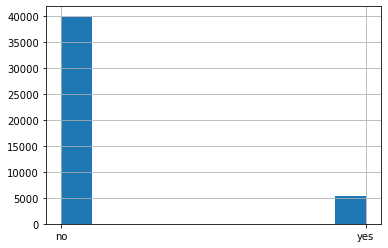

In [50]:
df['y'].hist()

As it is not correctly balanced, let's splitt in a stratified way to be sure the same percentage of **no** and **yes** samples will be splitted to train and test

#### Splitting dataset into 75% train and 25% test

In [53]:
skf = StratifiedKFold(n_splits=K_FOLDS)
print(skf)
# StratifiedKFold(n_splits=2, random_state=None, shuffle=False)

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


In [54]:
#Chau Work from here

X_train, X_test, y_train, y_test = train_test_split(X_rb, y, test_size=0.25, random_state=42, stratify=y)

#check data
X_train.head()

,job_blue_collar,job_retired,marital_married,housing_yes,loan_yes,contact_unknown,poutcome_success,poutcome_unknown
9028,0,0,1,1,0,0,0,1
1694,0,0,1,1,0,1,0,1
5535,0,0,0,0,0,0,0,1
3549,0,0,1,0,0,0,0,1
1367,0,0,0,0,0,0,0,1


In [68]:
y_test.value_counts()

0    1981
1     280
Name: y_yes, dtype: int64

In [67]:
y_train.value_counts()

0    5970
1     811
Name: y_yes, dtype: int64

In [56]:
#Names of the various classification approaches for easy presentation of the results
names = ["Nearest Neighbors", "Decision Tree", "Naive Bayes", "Random Forest", "Ada BOOST", "XGBOOST"]

scores = [] #list variable to hold classification accuracy scores

classifiers = [
    KNeighborsClassifier(3),  
    DecisionTreeClassifier(max_depth=5),    
    GaussianNB(),
    RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000),
    AdaBoostClassifier(learning_rate=0.1),
    XGBClassifier()]

for classifier in classifiers:
    pipeline = Pipeline(steps=[('classifier', classifier)])
    cv = KFold(n_splits=3)
    pipeline.fit(X_train, y_train)
    n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv)
    print(classifier)
    scores.append(mean(n_scores))
    print('Model mean accuracy score: %.6f ' % mean(n_scores))
    print("\n -----------------------------------------------------------------------------------")
    
#end of pipeline

KNeighborsClassifier(n_neighbors=3)
Model mean accuracy score: 0.878631 

 -----------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
Model mean accuracy score: 0.891314 

 -----------------------------------------------------------------------------------
GaussianNB()
Model mean accuracy score: 0.867129 

 -----------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000)
Model mean accuracy score: 0.890577 

 -----------------------------------------------------------------------------------
AdaBoostClassifier(learning_rate=0.1)
Model mean accuracy score: 0.891904 

 -----------------------------------------------------------------------------------
[11:18:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/Users/leozitor/.conda/envs/fastai/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/leozitor/.conda/envs/fastai/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/leozitor/.conda/envs/fastai/lib/python3.8/site-

[11:18:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:18:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/leozitor/.conda/envs/fastai/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Model mean accuracy score: 0.891314 

 -----------------------------------------------------------------------------------


In [57]:
#Print data frame of prediction scores
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy Score'])

print(scores_df)

          Classifier  Accuracy Score
0  Nearest Neighbors        0.878631
1      Decision Tree        0.891314
2        Naive Bayes        0.867129
3      Random Forest        0.890577
4          Ada BOOST        0.891904
5            XGBOOST        0.891314


# 6 Classifier Model - The Second Try

In [58]:
# feature selection method with random forest as the estimator.
sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000)).fit(X, y)
X_selected = sel.transform(X)
sel.get_support()

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False])

In [59]:
# check the accuracy score
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=0)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [60]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88633


In [61]:
# get the columns selected information
sel.get_support(indices=True)

array([ 0,  1,  2,  3,  5, 28])

In [62]:
X_selected=X.iloc[:,sel.get_support(indices=True)]
                  
X_selected.head()

,age,balance,campaign,pdays,last_contact,poutcome_success
0,40,580,1,-1,186,0
1,47,3644,2,-1,162,0
2,25,538,1,-1,212,0
3,42,1773,1,336,223,0
4,56,217,2,-1,120,0


#### There are 6 feature using random forest as an estimator

In [63]:
#Names of the various classification approaches for easy presentation of the results
names = ["Nearest Neighbors", "Decision Tree", "Naive Bayes", "Random Forest", "Ada BOOST", "XGBOOST"]

scores = [] #list variable to hold classification accuracy scores

classifiers = [
    KNeighborsClassifier(3),  
    DecisionTreeClassifier(max_depth=5),    
    GaussianNB(),
    RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000),
    AdaBoostClassifier(learning_rate=0.1),
    XGBClassifier()]

for classifier in classifiers:
    pipeline = Pipeline(steps=[
                      ('classifier', classifier)])
    cv = KFold(n_splits=3)
    pipeline.fit(X_train, y_train)
    n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv)
    print(classifier)
    scores.append(mean(n_scores))
    print('Model mean accuracy score: %.6f ' % mean(n_scores))
    print("\n -----------------------------------------------------------------------------------")
    
#end of pipeline

KNeighborsClassifier(n_neighbors=3)
Model mean accuracy score: 0.864917 

 -----------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
Model mean accuracy score: 0.888512 

 -----------------------------------------------------------------------------------
GaussianNB()
Model mean accuracy score: 0.882170 

 -----------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000)
Model mean accuracy score: 0.889249 

 -----------------------------------------------------------------------------------
AdaBoostClassifier(learning_rate=0.1)
Model mean accuracy score: 0.888807 

 -----------------------------------------------------------------------------------
[11:18:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/Users/leozitor/.conda/envs/fastai/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/leozitor/.conda/envs/fastai/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/leozitor/.conda/envs/fastai/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/leozitor/.conda/envs/fastai/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Model mean accuracy score: 0.883645 

 -----------------------------------------------------------------------------------


# 7 Model Evaluation

# 8 Prediction
